# Statistical Arbitrage

## Agumented Dickey Fuller Test

In [11]:
# ADF for AUDCAD

import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    # Perform ADF test
    result = adfuller(data,maxlag=1)
    
    # Print results
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")

data = pd.read_csv('AUDCAD.csv',index_col=0)
data.index = pd.to_datetime(data.index)
data.head()

# Download stock data
# ticker = "AAPL"  # Example ticker symbol (Apple Inc.)
# start_date = "2020-01-01"
# end_date = "2023-01-01"
# data = yf.download(ticker, start=start_date, end=end_date,progress=True)

# Close price ADF test
print("Close Price ADF Test:")
adf_test(data["Close"])


Close Price ADF Test:
ADF Statistic: -2.568066229486821
p-value: 0.09977855982317985
Critical Values:
	1%: -3.4323913423381103
	5%: -2.862441941529731
	10%: -2.567250123571329


Since the 0.05 < p-value ≤ 0.1: Weak evidence against the null hypothesis also the crital value for 99%, 95% and 90% is -3.4,-2.86, -2.56 respectively it lies in the reject Ho zone we'll reject the null Hypothesis
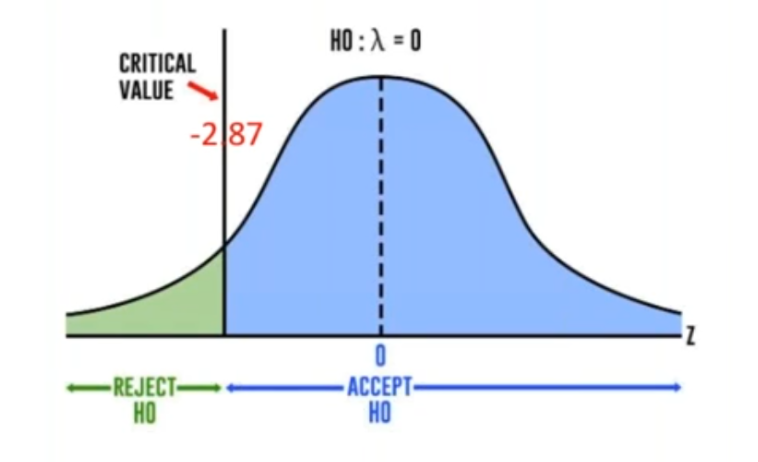

## Now we'll create a mean reverting stratergy for this asset

In [12]:
# import neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] =(10,7)

In [13]:
df = pd.read_csv('AUDCAD.csv',index_col=0)

,Open,High,Low,Close,Volume
Date,,,,,
2011-12-05,1.041400,1.043600,1.038600,1.041400,0
2011-12-06,1.042600,1.043500,1.034000,1.042600,0
2011-12-07,1.033700,1.037500,1.033600,1.034000,0
2011-12-08,1.037000,1.043100,1.033700,1.037300,0
2011-12-09,1.040400,1.041100,1.030500,1.040300,0
...,...,...,...,...,...
2024-03-14,0.892454,0.892757,0.888870,0.892454,0
2024-03-15,0.890200,0.890520,0.886700,0.890200,0
2024-03-18,0.888311,0.889950,0.887700,0.888311,0
